## Perceptron Classification Animation (Weight Updates Over Iterations)

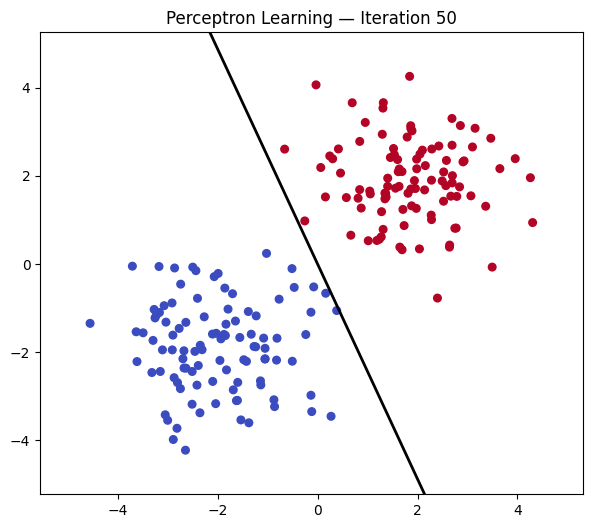

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create GIF folder
os.makedirs("gifs", exist_ok=True)

# Generate simple linearly separable dataset
np.random.seed(0)
N = 100

# Class 0
mean0 = [-2, -2]
cov = [[1, 0], [0, 1]]
X0 = np.random.multivariate_normal(mean0, cov, N)

# Class 1
mean1 = [2, 2]
X1 = np.random.multivariate_normal(mean1, cov, N)

X = np.vstack([X0, X1])
y = np.hstack([np.zeros(N), np.ones(N)])

# Add bias term
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Perceptron training
weights = np.zeros(3)
lr = 0.1
iterations = 50

weight_history = []

for _ in range(iterations):
    for xi, yi in zip(X_bias, y):
        pred = 1 if np.dot(weights, xi) >= 0 else 0
        weights += lr * (yi - pred) * xi

    weight_history.append(weights.copy())

# Mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx = np.linspace(x_min, x_max, 300)

fig, ax = plt.subplots(figsize=(7, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=30)
line, = ax.plot([], [], 'k-', linewidth=2)

def update(i):
    w0, w1, w2 = weight_history[i]

    # Decision boundary: w0 + w1*x + w2*y = 0  →  y = -(w0 + w1*x) / w2
    if w2 != 0:
        yy = -(w0 + w1 * xx) / w2
        line.set_data(xx, yy)

    ax.set_title(f"Perceptron Learning — Iteration {i+1}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    return line,

ani = FuncAnimation(fig, update, frames=len(weight_history), interval=300)

# Save GIF
ani.save("gifs/perceptron_classification.gif", writer="pillow")

plt.show()
